In [10]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from keras.utils import to_categorical
from sklearn.utils import shuffle

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as kr


y = np.arange(6000)% 10

image_path =  [ './BengaliBMP/' + p for p in os.listdir('./BengaliBMP/') ]

input_shape=(48, 48, 1)
classes=10

def imshow(img):
    plt.imshow(img, cmap='gray')
    
# Reads an image then converts it to grayscale
def imread(img_path, max_width=48):
    x = cv2.imread(img_path)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) / 255
    pad_width = int ( (max_width - x.shape[0]) / 2 ) 
    return np.pad(x, pad_width=pad_width, mode='constant', constant_values=[1])


def get_train_X(img_path=image_path, size=(48, 48)):
    X = np.empty((len(img_path), size[0], size[1]))
    for i, path in enumerate(img_path):
        X[i] = imread(path)
    X = X.reshape(X.shape[0], size[0], size[1], 1)
    return X

def get_train_Y(categorical=True):
    if categorical == True:
        return to_categorical(np.arange(6000)% 10)
    return np.arange(6000)% 10

In [2]:

Y_train = get_train_Y()

In [11]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 48, 48

X_train = get_train_X()
x_train = np.reshape(X_train, (X_train.shape[0], img_rows, img_cols, 1))
y_train = get_train_Y()

x_train, y_train = shuffle(x_train, y_train)

In [134]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33)

Train on 4019 samples, validate on 1981 samples
Epoch 1/12
4019/4019 [==============================] - 2s 550us/step - loss: 1.2947 - acc: 0.5778 - val_loss: 0.8095 - val_acc: 0.7269
Epoch 2/12
4019/4019 [==============================] - 1s 259us/step - loss: 0.3656 - acc: 0.8880 - val_loss: 0.2087 - val_acc: 0.9384
Epoch 3/12
4019/4019 [==============================] - 1s 263us/step - loss: 0.2304 - acc: 0.9251 - val_loss: 0.1915 - val_acc: 0.9389
Epoch 4/12
4019/4019 [==============================] - 1s 264us/step - loss: 0.1696 - acc: 0.9435 - val_loss: 0.2132 - val_acc: 0.9248
Epoch 5/12
4019/4019 [==============================] - 1s 272us/step - loss: 0.1455 - acc: 0.9579 - val_loss: 0.1129 - val_acc: 0.9697
Epoch 6/12
4019/4019 [==============================] - 1s 260us/step - loss: 0.1149 - acc: 0.9649 - val_loss: 0.1013 - val_acc: 0.9707
Epoch 7/12
4019/4019 [==============================] - 1s 267us/step - loss: 0.0957 - acc: 0.9716 - val_loss: 0.1439 - val_acc: 0.9546


In [81]:
test_samples = ['./test_output48x48/test_output48x48/' + img for img in os.listdir('./test_output48x48/test_output48x48/')]

    
    
# imshow(imread('./test_output48x48/test_output48x48/9_6_resized.jpg'))
img = imread('./test_output48x48/test_output48x48/7_3_resized.jpg')

In [135]:
img = cv2.imread('./test_output48x48/test_output48x48/5_6_resized.jpg', 0)

In [136]:
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

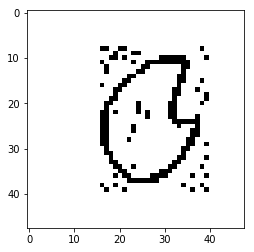

In [137]:
plt.imshow(img, cmap='gray')

In [138]:
img = img / 255

In [139]:
img = np.reshape(img, (1, 48, 48, 1))

In [140]:
np.argmax(model.predict(img))

7

In [149]:
def predict(image, m=model):
    image_path = './test_output48x48/test_output48x48/' + image + '_resized.jpg' 
    img = cv2.imread(image_path, 0)
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    img = img / 255
    img = np.reshape(img, (1, 48, 48, 1))
    return np.argmax(m.predict(img))

In [169]:
test_image_samples = []
for i in range(10):
    for j in range(1, 6):
        test_image_samples.append(str(i) + '_' + str(j))

In [171]:
for test_image in test_image_samples:
    print("Real - Predicted : {} - {}".format(test_image.split('_')[0], predict(test_image)))

Real - Predicted : 0 - 5
Real - Predicted : 0 - 3
Real - Predicted : 0 - 9
Real - Predicted : 0 - 3
Real - Predicted : 0 - 7
Real - Predicted : 1 - 9
Real - Predicted : 1 - 1
Real - Predicted : 1 - 9
Real - Predicted : 1 - 4
Real - Predicted : 1 - 9
Real - Predicted : 2 - 2
Real - Predicted : 2 - 2
Real - Predicted : 2 - 2
Real - Predicted : 2 - 2
Real - Predicted : 2 - 2
Real - Predicted : 3 - 3
Real - Predicted : 3 - 3
Real - Predicted : 3 - 9
Real - Predicted : 3 - 7
Real - Predicted : 3 - 3
Real - Predicted : 4 - 4
Real - Predicted : 4 - 4
Real - Predicted : 4 - 0
Real - Predicted : 4 - 8
Real - Predicted : 4 - 4
Real - Predicted : 5 - 5
Real - Predicted : 5 - 6
Real - Predicted : 5 - 7
Real - Predicted : 5 - 6
Real - Predicted : 5 - 7
Real - Predicted : 6 - 6
Real - Predicted : 6 - 6
Real - Predicted : 6 - 6
Real - Predicted : 6 - 6
Real - Predicted : 6 - 3
Real - Predicted : 7 - 7
Real - Predicted : 7 - 7
Real - Predicted : 7 - 7
Real - Predicted : 7 - 8
Real - Predicted : 7 - 7


In [168]:
test_image_samples

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '1_4',
 '1_5',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '2_5',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '4_0',
 '4_1',
 '4_2',
 '4_3',
 '4_4',
 '4_5',
 '5_0',
 '5_1',
 '5_2',
 '5_3',
 '5_4',
 '5_5',
 '6_0',
 '6_1',
 '6_2',
 '6_3',
 '6_4',
 '6_5',
 '7_0',
 '7_1',
 '7_2',
 '7_3',
 '7_4',
 '7_5',
 '8_0',
 '8_1',
 '8_2',
 '8_3',
 '8_4',
 '8_5',
 '9_0',
 '9_1',
 '9_2',
 '9_3',
 '9_4',
 '9_5']